In [1]:
path_lwf = '/home/karokaro/research-repositories/FACIL/results/tiny-imagenet-200_lwf_final_tiny_img'

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwf) if isfile(join(path_lwf, f))]
onlyfiles

['args-2025-01-24-18-10.txt',
 'args-2025-01-24-17-27.txt',
 'stdout-2025-01-24-19-11.txt',
 'stderr-2025-01-24-17-27.txt',
 'stdout-2025-01-24-19-38.txt',
 'raw_log-2025-01-24-19-11.txt',
 'raw_log-2025-01-24-18-33.txt',
 'args-2025-01-24-17-50.txt',
 'stdout-2025-01-24-17-01.txt',
 'args-2025-01-24-19-11.txt',
 'raw_log-2025-01-24-17-50.txt',
 'stdout-2025-01-24-18-33.txt',
 'args-2025-01-24-18-33.txt',
 'stdout-2025-01-24-17-50.txt',
 'raw_log-2025-01-24-18-10.txt',
 'stderr-2025-01-24-17-01.txt',
 'raw_log-2025-01-24-16-38.txt',
 'stderr-2025-01-24-18-10.txt',
 'raw_log-2025-01-24-19-38.txt',
 'stdout-2025-01-24-16-38.txt',
 'args-2025-01-24-18-50.txt',
 'stderr-2025-01-24-18-33.txt',
 'stderr-2025-01-24-16-38.txt',
 'raw_log-2025-01-24-17-27.txt',
 'stderr-2025-01-24-18-50.txt',
 'raw_log-2025-01-24-18-50.txt',
 'raw_log-2025-01-24-17-01.txt',
 'args-2025-01-24-16-38.txt',
 'args-2025-01-24-17-01.txt',
 'stdout-2025-01-24-18-50.txt',
 'stdout-2025-01-24-18-10.txt',
 'stderr-2025-0

In [3]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [4]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwf, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [5]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwf, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [6]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [7]:
import pandas as pd
import numpy as np
from itertools import chain
data = pd.DataFrame({'Approach': list(chain.from_iterable([['LWF' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_41327/1207693049.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

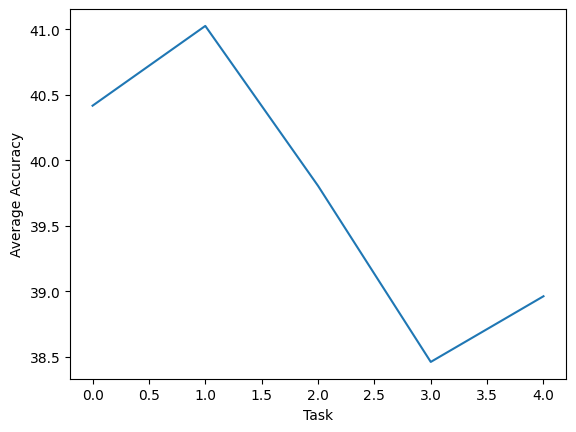

In [8]:
import seaborn as sns
sns.lineplot( data,  x='Task', y='Average Accuracy', ci=None)

In [9]:
data.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWF      0                40.42                 NaN
         1                41.02                2.37
         2                39.81                4.04
         3                38.46                5.69
         4                38.96                5.17

In [10]:
path_ewc = '/home/karokaro/research-repositories/FACIL/results/tiny-imagenet-200_ewc_final_tiny_img'

In [ ]:
onlyfiles = [f for f in listdir(path_ewc) if isfile(join(path_ewc, f))]
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [12]:
import json
arg_dict = {}
for file in args:
    with open(join(path_ewc, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [13]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_ewc, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [14]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [15]:
data_ewc = pd.DataFrame({'Approach': list(chain.from_iterable([['EWC' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

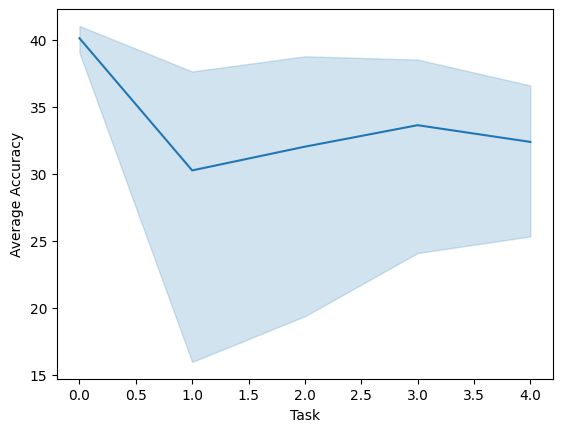

In [16]:
sns.lineplot( data_ewc,  x='Task', y='Average Accuracy')

In [17]:
data_ewc.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
EWC      0                40.13                 NaN
         1                30.27               10.47
         2                32.04                4.69
         3                33.64                3.11
         4                32.39                5.15

In [18]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/tiny-imagenet-200_lwm_final_tiny_img'

In [19]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['stderr-2025-01-24-11-38.txt',
 'raw_log-2025-01-24-13-49.txt',
 'raw_log-2025-01-24-14-25.txt',
 'stdout-2025-01-24-13-49.txt',
 'stderr-2025-01-24-11-13.txt',
 'args-2025-01-24-11-38.txt',
 'stderr-2025-01-24-13-26.txt',
 'stderr-2025-01-24-12-30.txt',
 'args-2025-01-24-15-14.txt',
 'stdout-2025-01-24-11-38.txt',
 'stdout-2025-01-24-12-30.txt',
 'raw_log-2025-01-24-12-04.txt',
 'stdout-2025-01-24-12-59.txt',
 'stdout-2025-01-24-15-14.txt',
 'stdout-2025-01-24-11-13.txt',
 'args-2025-01-24-14-25.txt',
 'args-2025-01-24-12-04.txt',
 'stderr-2025-01-24-12-59.txt',
 'args-2025-01-24-12-30.txt',
 'raw_log-2025-01-24-13-26.txt',
 'stderr-2025-01-24-15-14.txt',
 'stdout-2025-01-24-12-04.txt',
 'stderr-2025-01-24-14-25.txt',
 'raw_log-2025-01-24-15-14.txt',
 'stderr-2025-01-24-13-49.txt',
 'stdout-2025-01-24-14-25.txt',
 'args-2025-01-24-11-13.txt',
 'stdout-2025-01-24-13-26.txt',
 'raw_log-2025-01-24-11-38.txt',
 'args-2025-01-24-13-26.txt',
 'args-2025-01-24-13-49.txt',
 'raw_log-2025-01-

In [20]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [21]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [22]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [23]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [24]:
import pandas as pd
import numpy as np
from itertools import chain
data_lwm = pd.DataFrame({'Approach': list(chain.from_iterable([['LWM' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

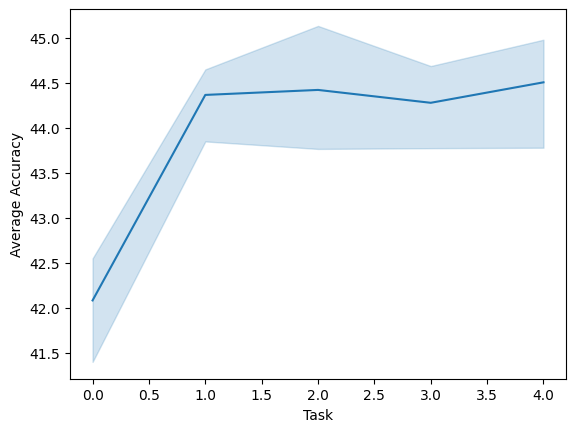

In [25]:
sns.lineplot( data_lwm,  x='Task', y='Average Accuracy')

In [26]:
data_lwm.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
LWM      0                42.08                 NaN
         1                44.37               -0.25
         2                44.42                0.15
         3                44.28                0.74
         4                44.51                1.19

In [27]:
path_icarl = '/home/karokaro/research-repositories/FACIL/results/tiny-imagenet-200_icarl_final_tiny_img'

In [28]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_icarl) if isfile(join(path_icarl, f))]
onlyfiles

['stderr-2025-01-23-16-08.txt',
 'stdout-2025-01-23-15-54.txt',
 'raw_log-2025-01-23-16-08.txt',
 'stdout-2025-01-23-16-21.txt',
 'stdout-2025-01-23-15-39.txt',
 'stderr-2025-01-23-15-22.txt',
 'stderr-2025-01-23-15-54.txt',
 'stdout-2025-01-23-16-33.txt',
 'args-2025-01-23-15-39.txt',
 'stdout-2025-01-23-15-22.txt',
 'args-2025-01-23-16-33.txt',
 'args-2025-01-23-15-22.txt',
 'raw_log-2025-01-23-16-33.txt',
 'stderr-2025-01-23-16-33.txt',
 'args-2025-01-23-15-54.txt',
 'args-2025-01-23-15-07.txt',
 'stdout-2025-01-23-17-13.txt',
 'raw_log-2025-01-23-15-54.txt',
 'stderr-2025-01-23-17-27.txt',
 'raw_log-2025-01-23-17-13.txt',
 'stdout-2025-01-23-15-07.txt',
 'stderr-2025-01-23-15-07.txt',
 'stderr-2025-01-23-15-39.txt',
 'raw_log-2025-01-23-15-22.txt',
 'stderr-2025-01-23-16-21.txt',
 'raw_log-2025-01-23-15-39.txt',
 'raw_log-2025-01-23-16-21.txt',
 'args-2025-01-23-16-21.txt',
 'stderr-2025-01-23-17-13.txt',
 'args-2025-01-23-17-13.txt',
 'stdout-2025-01-23-16-08.txt',
 'args-2025-01-

In [29]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [30]:
import json
arg_dict = {}
for file in args:
    with open(join(path_icarl, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [31]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_icarl, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [32]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [ ]:
import pandas as pd
import numpy as np
from itertools import chain
data_icarl = pd.DataFrame({'Approach': list(chain.from_iterable([['iCaRL' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [34]:
data_icarl.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
iCaRL    0                38.88                 NaN
         1                 2.50               36.38
         2                 2.50               18.19
         3                 2.50               12.13
         4                 2.50                9.10

In [35]:
path_rere = '/home/karokaro/research-repositories/FACIL/results/tiny-imagenet-200_rere_lrp_final_tiny_img'

In [36]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_rere) if isfile(join(path_rere, f))]
onlyfiles

['stderr-2025-01-27-03-56.txt',
 'stdout-2025-01-26-22-46.txt',
 'raw_log-2025-01-26-16-18.txt',
 'stderr-2025-01-26-16-18.txt',
 'stderr-2025-01-26-05-57.txt',
 'stderr-2025-01-25-23-46.txt',
 'stdout-2025-01-25-23-46.txt',
 'stderr-2025-01-25-23-47.txt',
 'raw_log-2025-01-25-23-46.txt',
 'stderr-2025-01-26-21-10.txt',
 'args-2025-01-26-13-51.txt',
 'args-2025-01-25-23-47.txt',
 'stdout-2025-01-27-03-56.txt',
 'raw_log-2025-01-25-23-47.txt',
 'raw_log-2025-01-26-13-51.txt',
 'stdout-2025-01-26-05-57.txt',
 'args-2025-01-26-05-57.txt',
 'stderr-2025-01-26-22-46.txt',
 'stdout-2025-01-26-13-51.txt',
 'args-2025-01-27-03-56.txt',
 'stdout-2025-01-26-16-18.txt',
 'args-2025-01-25-23-46.txt',
 'raw_log-2025-01-26-22-46.txt',
 'args-2025-01-26-16-18.txt',
 'raw_log-2025-01-26-21-10.txt',
 'stderr-2025-01-26-08-33.txt',
 'raw_log-2025-01-26-05-57.txt',
 'stderr-2025-01-26-13-51.txt',
 'args-2025-01-26-08-33.txt',
 'raw_log-2025-01-27-03-56.txt',
 'args-2025-01-26-22-46.txt',
 'stdout-2025-01

In [37]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [38]:
import json
arg_dict = {}
for file in args:
    with open(join(path_rere, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [39]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_rere, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [40]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [ ]:
data_rere = pd.DataFrame({'Approach': list(chain.from_iterable([['ReReLRP' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

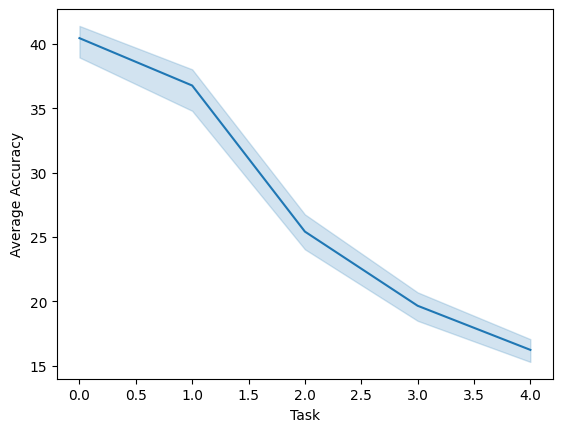

In [42]:
sns.lineplot( data_rere,  x='Task', y='Average Accuracy')

In [43]:
data_rere.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
ReReLRP  0                40.45                 NaN
         1                36.77                1.25
         2                25.41                0.62
         3                19.65                0.42
         4                16.22                0.31

In [44]:
path_lwm = '/home/karokaro/research-repositories/FACIL/results/tiny-imagenet-200_joint_final_tiny_img'

In [45]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path_lwm) if isfile(join(path_lwm, f))]
onlyfiles

['stderr-2025-01-22-00-25.txt',
 'raw_log-2025-01-21-22-11.txt',
 'stderr-2025-01-22-00-49.txt',
 'stdout-2025-01-21-22-39.txt',
 'stdout-2025-01-22-00-49.txt',
 'args-2025-01-22-00-25.txt',
 'stdout-2025-01-22-01-55.txt',
 'args-2025-01-22-01-22.txt',
 'args-2025-01-22-00-49.txt',
 'raw_log-2025-01-22-00-00.txt',
 'stderr-2025-01-21-21-11.txt',
 'stderr-2025-01-22-01-22.txt',
 'stdout-2025-01-21-22-11.txt',
 'stdout-2025-01-22-00-00.txt',
 'raw_log-2025-01-22-01-22.txt',
 'stderr-2025-01-21-22-39.txt',
 'args-2025-01-22-00-00.txt',
 'stdout-2025-01-22-01-22.txt',
 'args-2025-01-21-21-41.txt',
 'stdout-2025-01-22-00-25.txt',
 'stderr-2025-01-22-00-00.txt',
 'stderr-2025-01-21-22-11.txt',
 'raw_log-2025-01-21-21-11.txt',
 'stderr-2025-01-22-01-55.txt',
 'stdout-2025-01-21-21-41.txt',
 'stdout-2025-01-21-21-11.txt',
 'args-2025-01-21-21-11.txt',
 'args-2025-01-21-22-39.txt',
 'raw_log-2025-01-21-21-41.txt',
 'raw_log-2025-01-22-00-25.txt',
 'stderr-2025-01-21-21-41.txt',
 'raw_log-2025-0

In [46]:
args = [file for file in onlyfiles if 'args' in file ]
len(args)

9

In [47]:
import json
arg_dict = {}
for file in args:
    with open(join(path_lwm, file), 'r') as f:
        # regex time! we need only the timestamp of the file
        name = file.split('args-')[1]
        arg_dict[name] = json.loads(f.read())

In [48]:
import json

logs = [file for file in onlyfiles if 'raw_log' in file ]

res_dict = {}
for file in logs:
    with open(join(path_lwm, file), 'r') as f:
        name = file.split('raw_log-')[1]
        res_dict[name] = []
        for line in f:
            res_dict[name].append(json.loads(line.strip()))

In [49]:
import numpy as np
seeds = [0, 1, 2]
for seed in seeds:
    small = [key for key in arg_dict if arg_dict[key]["seed"]==seed]
    arg_means = {key:[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_tag" and k["group"]=="test" and k["task"] == i]) for i in [4]] for key in small}
    max_key = max(arg_means, key=arg_means.get)
    small.remove(max_key)
    for key in small:
        res_dict.pop(key)
        arg_dict.pop(key)

In [50]:
import pandas as pd
import numpy as np
from itertools import chain
data_joint = pd.DataFrame({'Approach': list(chain.from_iterable([['Joint' for i in range(5)] for key in res_dict.keys()])),
                     'Task': list(chain.from_iterable([[i for i in range(5)] for key in res_dict.keys()])),
                     'Average Accuracy': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="acc_taw" and k["group"]=="test" and k["task"] == i]) for i in range(5)] for key in res_dict.keys()])),
                     'Average Forgetting': list(chain.from_iterable([[np.mean([k["value"] for k in res_dict[key] if k["name"]=="forg_taw" and k["group"]=="test" and k["task"] == i and k["iter"] != k["task"]]) for i in range(5)] for key in res_dict.keys()]))})

/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/karokaro/research-repositories/FACIL/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_41327/2585113533.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)


<Axes: xlabel='Task', ylabel='Average Accuracy'>

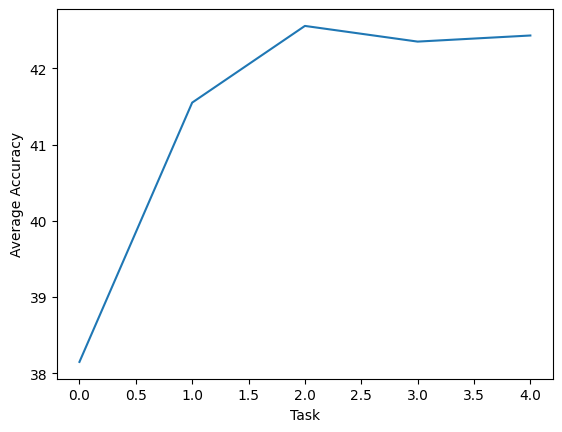

In [51]:
sns.lineplot( data_joint,  x='Task', y='Average Accuracy', ci=None)

In [52]:
data_joint.groupby(['Approach', 'Task']).mean().apply(lambda x: round(x, 2))

Average Accuracy  Average Forgetting
Approach Task                                      
Joint    0                38.15                 NaN
         1                41.55               -4.77
         2                42.56               -2.17
         3                42.35               -1.25
         4                42.43               -0.84

In [53]:
data_all = pd.concat([data, data_ewc, data_icarl, data_rere, data_joint, data_lwm], ignore_index=True)

/tmp/ipykernel_41327/2809554026.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)


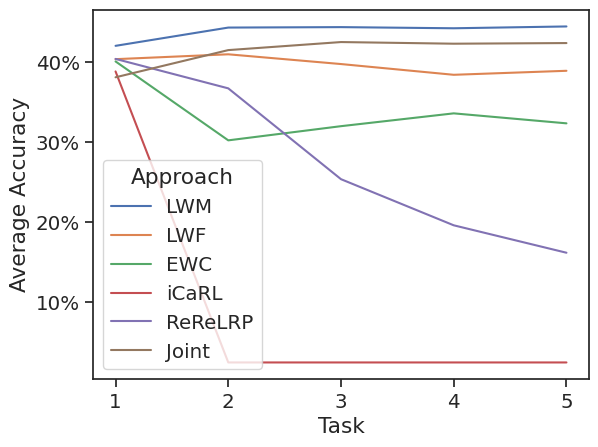

In [54]:
import matplotlib.pyplot as plt
hue_order = ["LWM", "LWF", "EWC", "iCaRL", "ReReLRP", "Joint"]
paletter = sns.color_palette("colorblind", 6)
sns.set_theme(style="ticks", font_scale=1.3) 
g = sns.lineplot( data_all, hue='Approach', x='Task', y='Average Accuracy', hue_order=hue_order, ci=None)
g.set_xticks(range(5))
g.set_xticklabels([i+1 for i in range(5)])
import matplotlib.ticker as mtick
g.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.savefig("tiny_taw.pdf", format='pdf', bbox_inches='tight')